<a href="https://colab.research.google.com/github/VivekShahare04/Deep_Learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = MNIST(root='data',train=True,download=True,transform=transform)
len(train_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37294490.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 995895.05it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9251781.08it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3762695.79it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



60000

In [ ]:
import numpy as np
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data,batch_size=50,num_workers=0)

In [ ]:
detaitor = iter(train_loader)
images,labels = next(detaitor)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([50, 1, 28, 28])
torch.Size([50])


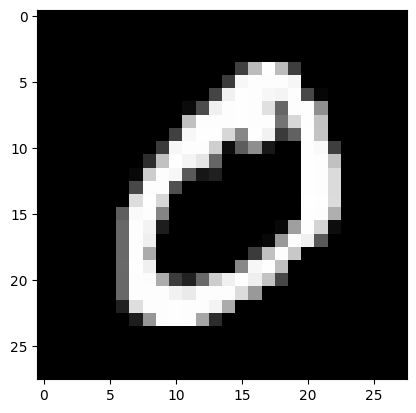

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [ ]:
img_zero = images[1]

In [ ]:
from torch import nn,optim
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,10)

    def forward(self,x):
      x = x.view(x.shape[0],-1)
      x=F.relu(self.fc1(x))
      x=self.fc2(x)
      return x

In [ ]:
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
for epoch in range(1,12):
  train_loss=[]

  for data,target in train_loader:
    optimizer.zero_grad()

    output = model(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  print(epoch,np.mean(train_loss))

1 0.5074334848641108
2 0.2716556816486021
3 0.2226748585817404
4 0.18941473648650572
5 0.1650110774526062
6 0.14626457170428087
7 0.131300096900668
8 0.11901405847243343
9 0.10871283131185919
10 0.099949680037098
11 0.09238581337616779
